In [1]:
from pathlib import PosixPath

from PIL import Image
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import os
from datetime import datetime
import torch
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

## 1 - Load generative Img2Text model + preprocessing pipeline

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
processor = AutoProcessor.from_pretrained('../data/models/blip2')
model = Blip2ForConditionalGeneration.from_pretrained(
    'blip2_fp16', 
    max_memory={"cpu": "1GIB"}, 
    offload_state_dict=True, 
    # dtorch_device=device,
    torch_dtype=torch.float16).to(device)

In [3]:
def inference(image, pre_prompt=None, dtype=torch.float16):
    inputs = processor(image, text=pre_prompt, return_tensors="pt").to(device, dtype)

    generated_ids = model.generate(**inputs, max_new_tokens=128)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

    return generated_text

## 2 - Data loading

In [4]:
data_dir = PosixPath('../data/images')
images = data_dir.glob('**/*.png')

In [5]:
images

<generator object Path.glob at 0x7fe52b4b4f20>

In [6]:
image = Image.open(next(iter(images)))

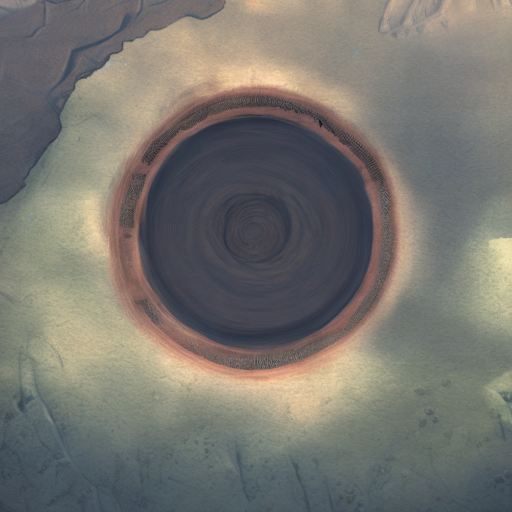

In [7]:
image

## 3 - Inference

In [8]:
inference(image, pre_prompt='This image can be succinctly described as')

'a "hole in the ground"'

In [9]:
inference(image)

'a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole in the ground, a hole'